# Task 1:Prediction using Supervised ML

# Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Importing all libraries required in this notebook


In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

Reading data from remote link


In [2]:
data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

data.head(25)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

Exploratory data analysis

In [8]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

visualization

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

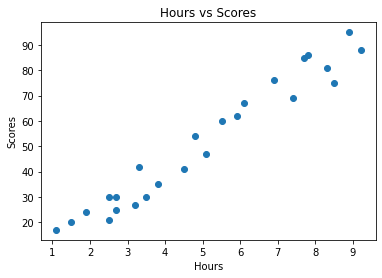

In [9]:
plt.scatter(x,y)
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)


Training the dataset using linear regression

In [11]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [12]:
y_pred = model.predict(x_test)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

Comparing Actual vs Predicted


In [13]:
df = pd.DataFrame({'Actual' : y_test,'Predicted' : y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


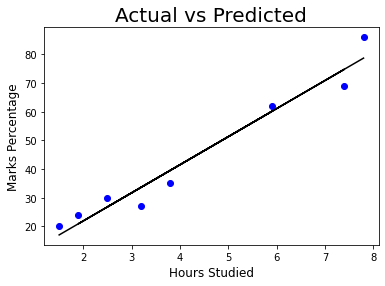

In [14]:
plt.scatter(x=x_test,y=y_test,color = 'blue')
plt.plot(x_test,y_pred,color = 'black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different
algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such 
metrics.

In [15]:
from sklearn import metrics
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error :  4.419727808027651


In [16]:
from sklearn.metrics import r2_score
print("The R-square of the model :",r2_score(y_test,y_pred))

The R-square of the model : 0.9568211104435257


Predicting the score


In [17]:
data = np.array(9.25)
data = data.reshape(-1,1)
pred = model.predict(data)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [92.91505723].
